<div style="display: table; width: 100%;">
  <div style="display: table-cell; text-align: center; vertical-align: middle; width: 70%;">
    <h1>Inteligencia Artificial: Data Mining I</h1>
  </div>
  <div style="display: table-cell; text-align: center; vertical-align: middle; width: 30%;">
    <img src="https://github.com/UIDE-Tareas/4-Inteligencia-Artificial-Data-Mining-I-Tarea1/blob/main/Assets/UideLogo.png?raw=true" alt="Texto alternativo" style="width:50%;">
  </div>
</div>
<hr />

# Análisis Exploratorio de Datos
## Adult Income Dataset

**Maestría en Ciencia de Datos y Máquinas de Aprendizaje**  

**Autores - Estudiantes - Grupo 7:**

 💻 Luis Miguel Ramírez      
 💻 Aviles Paute José     
 💻 Espinoza Bone José    

### 🟦 Código fuente
[https://github.com/UIDE-Tareas/4-Inteligencia-Artificial-Data-Mining-I-Tarea1](https://github.com/UIDE-Tareas/4-Inteligencia-Artificial-Data-Mining-I-Tarea1)


**Fecha:** 29 de septiembre de 2025

---

### Objetivo
Realizar un análisis exploratorio completo del dataset Adult Income para identificar patrones, relaciones y factores que influyen en el ingreso de las personas (>50K vs <=50K).

In [39]:
import sys
import subprocess
import os 
from pathlib import Path
from enum import Enum 
import zipfile
from typing import Optional

# Libs a instalar
LIBS = [
    "matplotlib"
    "requests",
    "numpy",
    "pandas",
    "seaborn", 
]

class ConsoleColor(Enum):
    RED = "\033[91m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    BLUE = "\033[94m"
    MAGENTA = "\033[95m"
    CYAN = "\033[96m"
    WHITE = "\033[97m"
    RESET = "\033[0m"

def PrintColor(message: str, color: ConsoleColor) -> str:
    RESET = ConsoleColor.RESET.value
    return f"{color.value}{message}{RESET}"


def ShowMessage(message: str, title: str, icon: str, color: ConsoleColor, sep:str = "\n"):
    colored_title = PrintColor(icon + f"  " + title.upper() + ":", color)
    print(f"{colored_title} {message}", sep= sep)


def ShowInfoMessage(message: str, title: str = "Info", icon:str = "ℹ️", sep:str = "\n"):
    ShowMessage(message, title, icon, ConsoleColor.CYAN, sep)


def ShowSuccessMessage(message: str, title: str = "Success", icon:str = "✅",  sep:str = "\n"):
    ShowMessage(message, title, icon, ConsoleColor.GREEN, sep)


def ShowErrorMessage(message: str, title: str = "Error", icon:str = "❌", sep:str = "\n"):
    ShowMessage(message, title, icon, ConsoleColor.RED, sep)


def ShowWarningMessage(message: str, title: str = "Warning", icon:str = "⚠️", sep:str = "\n"):
    ShowMessage(message, title, icon, ConsoleColor.YELLOW, sep)


# Funcion para ejecutar comandos
def RunCommand(
    commandList: list[str], printCommand: bool = True, printError: bool = True
) -> subprocess.CompletedProcess:
    print("⏳", " ".join(commandList))
    stdOutput = None if printCommand else subprocess.DEVNULL
    errorOutput = None if printError else subprocess.PIPE
    result = subprocess.run(
        commandList, stdout=stdOutput, stderr=errorOutput, text=True
    )
    if result.returncode != 0 and printError:
        print(result.stderr)
    return result

# Función para instalar las dependencias
def InstallDeps(libs: Optional[list[str]] = None):
    print("ℹ️ Installing deps.")
    RunCommand(
        [sys.executable, "-m", "pip", "install", "--upgrade", "pip"], printCommand=True
    ) 
    if(libs is None or libs.count == 0):
        print("No hay elementos a instalar.")
    else:
        RunCommand([sys.executable, "-m", "pip", "install", *libs], printCommand=True)
        print("Deps installed.")
    print()

# Función para mostrar info el ambiente de ejecución
def ShowEnvironmentInfo():
    print("ℹ️  Environment Info:")
    print("Python Version:", sys.version)
    print("Platform:", sys.platform)
    print("Executable Path:", sys.executable)
    print("Current Working Directory:", os.getcwd())
    print("VIRTUAL_ENV:", os.environ.get("VIRTUAL_ENV"))
    print("sys.prefix:", sys.prefix)
    print("sys.base_prefix:", sys.base_prefix)
    print()

import requests

# Función para descargar un archivo
def DownloadFile(uri: str, filename: str, overwrite: bool = False, timeout: int = 20):
    dest = Path(filename).resolve()
    if dest.exists() and dest.is_file() and dest.stat().st_size > 0 and not overwrite:
        print(
            f'✅ Ya existe: "{dest}". No se descarga (use overwrite=True para forzar).'
        )
        return
    if dest.parent and not dest.parent.exists():
        dest.parent.mkdir(parents=True, exist_ok=True)
    print(f'ℹ️ Descargando "{uri}" → "{dest}"')
    try:
        with requests.get(uri, stream=True, timeout=timeout) as resp:
            resp.raise_for_status()
            tmp = dest.with_suffix(dest.suffix + ".part")
            with open(tmp, "wb") as f:
                for chunk in resp.iter_content(chunk_size=1024 * 64):
                    if chunk:  # filtra keep-alive chunks
                        f.write(chunk)
            tmp.replace(dest)
        print(f'✅ Archivo "{dest}" descargado exitosamente.')
    except requests.exceptions.RequestException as e:
        print(f"❌ Error al descargar: {e}")


# Función para descomprimir un archivo zip
def UnzipFile(filename: str, outputDir: str):
    print(f'ℹ️ Descomprimiendo "{filename}" en "{outputDir}"')
    try:
        with zipfile.ZipFile(filename, "r") as zip_ref:
            zip_ref.extractall(outputDir)
        print(f"Descomprimido en: {os.path.abspath(outputDir)}")
    except Exception as e:
        print(f"Error: {e}")


# Importar librerías
import pandas as pd
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)


# Función para mostrar la información del DataFrame.
def ShowTableInfo(df:pandas.DataFrame, title):
    display(f"ℹ️ {title} ℹ️".upper())
    df.info()
    display()

# Función para mostrar las n primeras filas del DataFrame.
def ShowTableHead(df:pandas.DataFrame, title:str, headQty=10):
    display(f"ℹ️ {title.upper()}: Primeros {headQty} elementos.")
    display(df.head(headQty))
    display()

# Función para mostrar las n últimas filas del DataFrame.
def ShowTableTail(df:pandas.DataFrame,title:str ,tailQty=10):
    display(f"ℹ️ {title.upper()}: Últimos {tailQty} elementos.")
    display(df.tail(tailQty))
    display()

# Mostrar el tamaño del DataFrame
def ShowTableShape(df:pandas.DataFrame, title:str):
    display(f"ℹ️ {title.upper()} - Tamaño de los datos")
    display(f"{df.shape[0]} filas x {df.shape[1]} columnas")
    display()

# Función para mostrar la estadística descriptiva de todas las columnas del DataFrame, por tipo de dato.
def ShowTableStats(df: pandas.DataFrame, title:str = ""):
    display(f"ℹ️ Estadística descriptiva - {title}".upper())
    numeric_types = ['int64', 'float64', 'Int64', 'Float64']
    numeric_cols = df.select_dtypes(include=numeric_types)
    if not numeric_cols.empty:
        display("    🔢 Columnas numéricas".upper())
        numeric_desc = numeric_cols.describe().round(2).T  # Transpuesta para añadir columna
        numeric_desc["var"] = numeric_cols.var().round(2)  # Añadir varianza
        display(numeric_desc.T) 
    non_numeric_types = ['object', 'string', 'bool', 'category']
    non_numeric_cols = df.select_dtypes(include=non_numeric_types)
    if not non_numeric_cols.empty:
        display("    🔡 Columnas no numéricas".upper())
        non_numeric_desc = non_numeric_cols.describe()
        display(non_numeric_desc)
    datetime_cols = df.select_dtypes(include=['datetime'])
    if not datetime_cols.empty:
        display("    📅 Columnas fechas".upper())
        datetime_desc = datetime_cols.describe()
        display(datetime_desc)

# Función para mostrar los valores nulos o NaN de cada columna en un DataFrame
def ShowNanValues(df: pandas.DataFrame):
    display(f"ℹ️ Contador de valores Nulos".upper())
    nulls_count = df.isnull().sum()
    nulls_df = nulls_count.reset_index()
    nulls_df.columns = ['Columna', 'Cantidad_Nulos']
    display(nulls_df)
    display()


print("="*70)
ShowInfoMessage("", "CONFIGURANDO ENTORNO")
print("="*70)

InstallDeps(LIBS)
ShowEnvironmentInfo()

ℹ️  CONFIGURANDO ENTORNO: 
ℹ️ Installing deps.
⏳ c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
⏳ c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe -m pip install matplotlibrequests numpy pandas seaborn
None
Deps installed.

ℹ️  Environment Info:
Python Version: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
Platform: win32
Executable Path: c:\Users\Megam\AppData\Local\Programs\Python\Python313\python.exe
Current Working Directory: c:\Users\Megam\OneDrive\Escritorio\4-Inteligencia-Artificial-Data-Mining-I-Tarea1
VIRTUAL_ENV: None
sys.prefix: c:\Users\Megam\AppData\Local\Programs\Python\Python313
sys.base_prefix: c:\Users\Megam\AppData\Local\Programs\Python\Python313



---
## 2. Descripción del Dataset

El dataset **Adult Income** (UCI Machine Learning Repository) contiene información censal con las siguientes características:

**Variables demográficas:** age, race, gender, native-country  
**Variables educativas:** education, educational-num  
**Variables laborales:** workclass, occupation, hours-per-week  
**Variables económicas:** fnlwgt, capital-gain, capital-loss  
**Variables sociales:** marital-status, relationship  
**Variable objetivo:** income (<=50K, >50K)

In [40]:
print("="*70)
ShowInfoMessage("", "CARGANDO DATASET")
print("="*70)

DOWNLOAD_DIR = "Temp"
DATA_FILE_URI = "https://github.com/UIDE-Tareas/4-Inteligencia-Artificial-Data-Mining-I-Tarea1/raw/refs/heads/main/Data/adult.csv"
DATA_FILENAME = f"{DOWNLOAD_DIR}/adult.csv"
DownloadFile(DATA_FILE_URI, DATA_FILENAME)
print()

# Cargar dataset
df = pd.read_csv(DATA_FILENAME)

print("="*70)
ShowInfoMessage("", "INFORMACIÓN GENERAL")
print("="*70)
ShowInfoMessage( f"{df.shape[0]:,} filas × {df.shape[1]} columnas", f"Dimensiones", "")
ShowInfoMessage(f"{df.memory_usage(deep=True).sum() / 1024**2:.2f} MB", f"Tamaño en memoria", "")
print()
ShowInfoMessage(f"{list(df.columns)}", f"Columnas", "")

ShowNanValues(df)
ShowTableStats(df)

# Vista previa
print("\n" + "="*70)
ShowInfoMessage("", "VISTA PREVIA DEL DATASET")
print("="*70)
display(df.head(10))

# Información estructural
print("\n" + "="*70)
ShowInfoMessage("", "ESTRUCTURA DEL DATASET")
print("="*70)
df.info()

# Calidad de datos
print("\n" + "="*70)
ShowInfoMessage("", "CALIDAD DE DATOS")
print("="*70)
print(f"Duplicados: {df.duplicated().sum():,}")
print(f"Valores faltantes totales: {df.isnull().sum().sum():,}")

if df.isnull().sum().sum() > 0:
    missing_df = pd.DataFrame({
        'Columna': df.columns,
        'Faltantes': df.isnull().sum(),
        'Porcentaje': (df.isnull().sum() / len(df) * 100).round(2)
    }).query('Faltantes > 0').sort_values('Faltantes', ascending=False)
    display(missing_df)
else:
    print("✓ Dataset completo sin valores faltantes")

ℹ️  CARGANDO DATASET: 
✅ Ya existe: "C:\Users\Megam\OneDrive\Escritorio\4-Inteligencia-Artificial-Data-Mining-I-Tarea1\Temp\adult.csv". No se descarga (use overwrite=True para forzar).

ℹ️  INFORMACIÓN GENERAL: 
  DIMENSIONES: 48,842 filas × 15 columnas
  TAMAÑO EN MEMORIA: 26.47 MB

  COLUMNAS: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


'ℹ️ CONTADOR DE VALORES NULOS'

,Columna,Cantidad_Nulos
0,age,0
1,workclass,0
2,fnlwgt,0
3,education,0
4,educational-num,0
5,marital-status,0
6,occupation,0
7,relationship,0
8,race,0
9,gender,0


'ℹ️ ESTADÍSTICA DESCRIPTIVA - '

'    🔢 COLUMNAS NUMÉRICAS'

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.00,48842.00,48842.00,48842.00,48842.00,48842.00
mean,38.64,189664.13,10.08,1079.07,87.50,40.42
std,13.71,105604.03,2.57,7452.02,403.00,12.39
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117550.50,9.00,0.00,0.00,40.00
50%,37.00,178144.50,10.00,0.00,0.00,40.00
75%,48.00,237642.00,12.00,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00
var,187.98,11152210185.57,6.61,55532588.04,162412.67,153.55


'    🔡 COLUMNAS NO NUMÉRICAS'

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155



ℹ️  VISTA PREVIA DEL DATASET: 


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K



ℹ️  ESTRUCTURA DEL DATASET: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

ℹ️  CALIDAD DE DATOS: 
Duplicados: 52
Valores

---
## 3. Estadísticas Descriptivas

In [41]:
# Variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("="*70)
ShowInfoMessage("", "ESTADÍSTICAS - VARIABLES NUMÉRICAS")
print("="*70)

# Estadísticas completas
stats = df[num_cols].describe().T
stats['missing'] = df[num_cols].isnull().sum()
stats['skewness'] = df[num_cols].skew()
stats['kurtosis'] = df[num_cols].kurtosis()

display(stats.round(2))

# Interpretación de distribuciones
print("\nINTERPRETACIÓN DE ASIMETRÍA:")
for col in num_cols:
    skew = df[col].skew()
    if abs(skew) < 0.5:
        dist = "Simétrica"
    elif skew > 0:
        dist = "Sesgada positiva"
    else:
        dist = "Sesgada negativa"
    print(f"  {col:20s}: {dist:20s} (skew={skew:6.2f})")

ℹ️  ESTADÍSTICAS - VARIABLES NUMÉRICAS: 


,count,mean,std,min,25%,50%,75%,max,missing,skewness,kurtosis
age,48842.00,38.64,13.71,17.00,28.00,37.00,48.00,90.00,0,0.56,-0.18
fnlwgt,48842.00,189664.13,105604.03,12285.00,117550.50,178144.50,237642.00,1490400.00,0,1.44,6.06
educational-num,48842.00,10.08,2.57,1.00,9.00,10.00,12.00,16.00,0,-0.32,0.63
capital-gain,48842.00,1079.07,7452.02,0.00,0.00,0.00,0.00,99999.00,0,11.89,152.69
capital-loss,48842.00,87.50,403.00,0.00,0.00,0.00,0.00,4356.00,0,4.57,20.01
hours-per-week,48842.00,40.42,12.39,1.00,40.00,40.00,45.00,99.00,0,0.24,2.95



INTERPRETACIÓN DE ASIMETRÍA:
  age                 : Sesgada positiva     (skew=  0.56)
  fnlwgt              : Sesgada positiva     (skew=  1.44)
  educational-num     : Simétrica            (skew= -0.32)
  capital-gain        : Sesgada positiva     (skew= 11.89)
  capital-loss        : Sesgada positiva     (skew=  4.57)
  hours-per-week      : Simétrica            (skew=  0.24)


In [42]:
# Variables categóricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("="*70)
ShowInfoMessage("", "ESTADÍSTICAS - VARIABLES CATEGÓRICAS")
print("="*70)

cat_summary = []
for col in cat_cols:
    cat_summary.append({
        'Variable': col,
        'Únicos': df[col].nunique(),
        'Más frecuente': df[col].mode()[0],
        'Frecuencia': df[col].value_counts().iloc[0],
        'Porcentaje': f"{df[col].value_counts(normalize=True).iloc[0]*100:.1f}%"
    })

display(pd.DataFrame(cat_summary))

# Variable objetivo
print("\n" + "="*70)
ShowInfoMessage("", "VARIABLE OBJETIVO: INCOME")
print("="*70)
income_dist = df['income'].value_counts()
income_pct = (income_dist / len(df) * 100).round(2)
income_df = pd.DataFrame({'Cantidad': income_dist, 'Porcentaje': income_pct})
display(income_df)

ratio = income_dist.max() / income_dist.min()
print(f"\nBalance del dataset: {ratio:.2f}:1 ({'DESBALANCEADO' if ratio > 1.5 else 'BALANCEADO'})")

ℹ️  ESTADÍSTICAS - VARIABLES CATEGÓRICAS: 


,Variable,Únicos,Más frecuente,Frecuencia,Porcentaje
0,workclass,9,Private,33906,69.4%
1,education,16,HS-grad,15784,32.3%
2,marital-status,7,Married-civ-spouse,22379,45.8%
3,occupation,15,Prof-specialty,6172,12.6%
4,relationship,6,Husband,19716,40.4%
5,race,5,White,41762,85.5%
6,gender,2,Male,32650,66.8%
7,native-country,42,United-States,43832,89.7%
8,income,2,<=50K,37155,76.1%



ℹ️  VARIABLE OBJETIVO: INCOME: 


,Cantidad,Porcentaje
income,,
<=50K,37155,76.07
>50K,11687,23.93



Balance del dataset: 3.18:1 (DESBALANCEADO)


---
## 4. Distribuciones Univariadas y Detección de Outliers

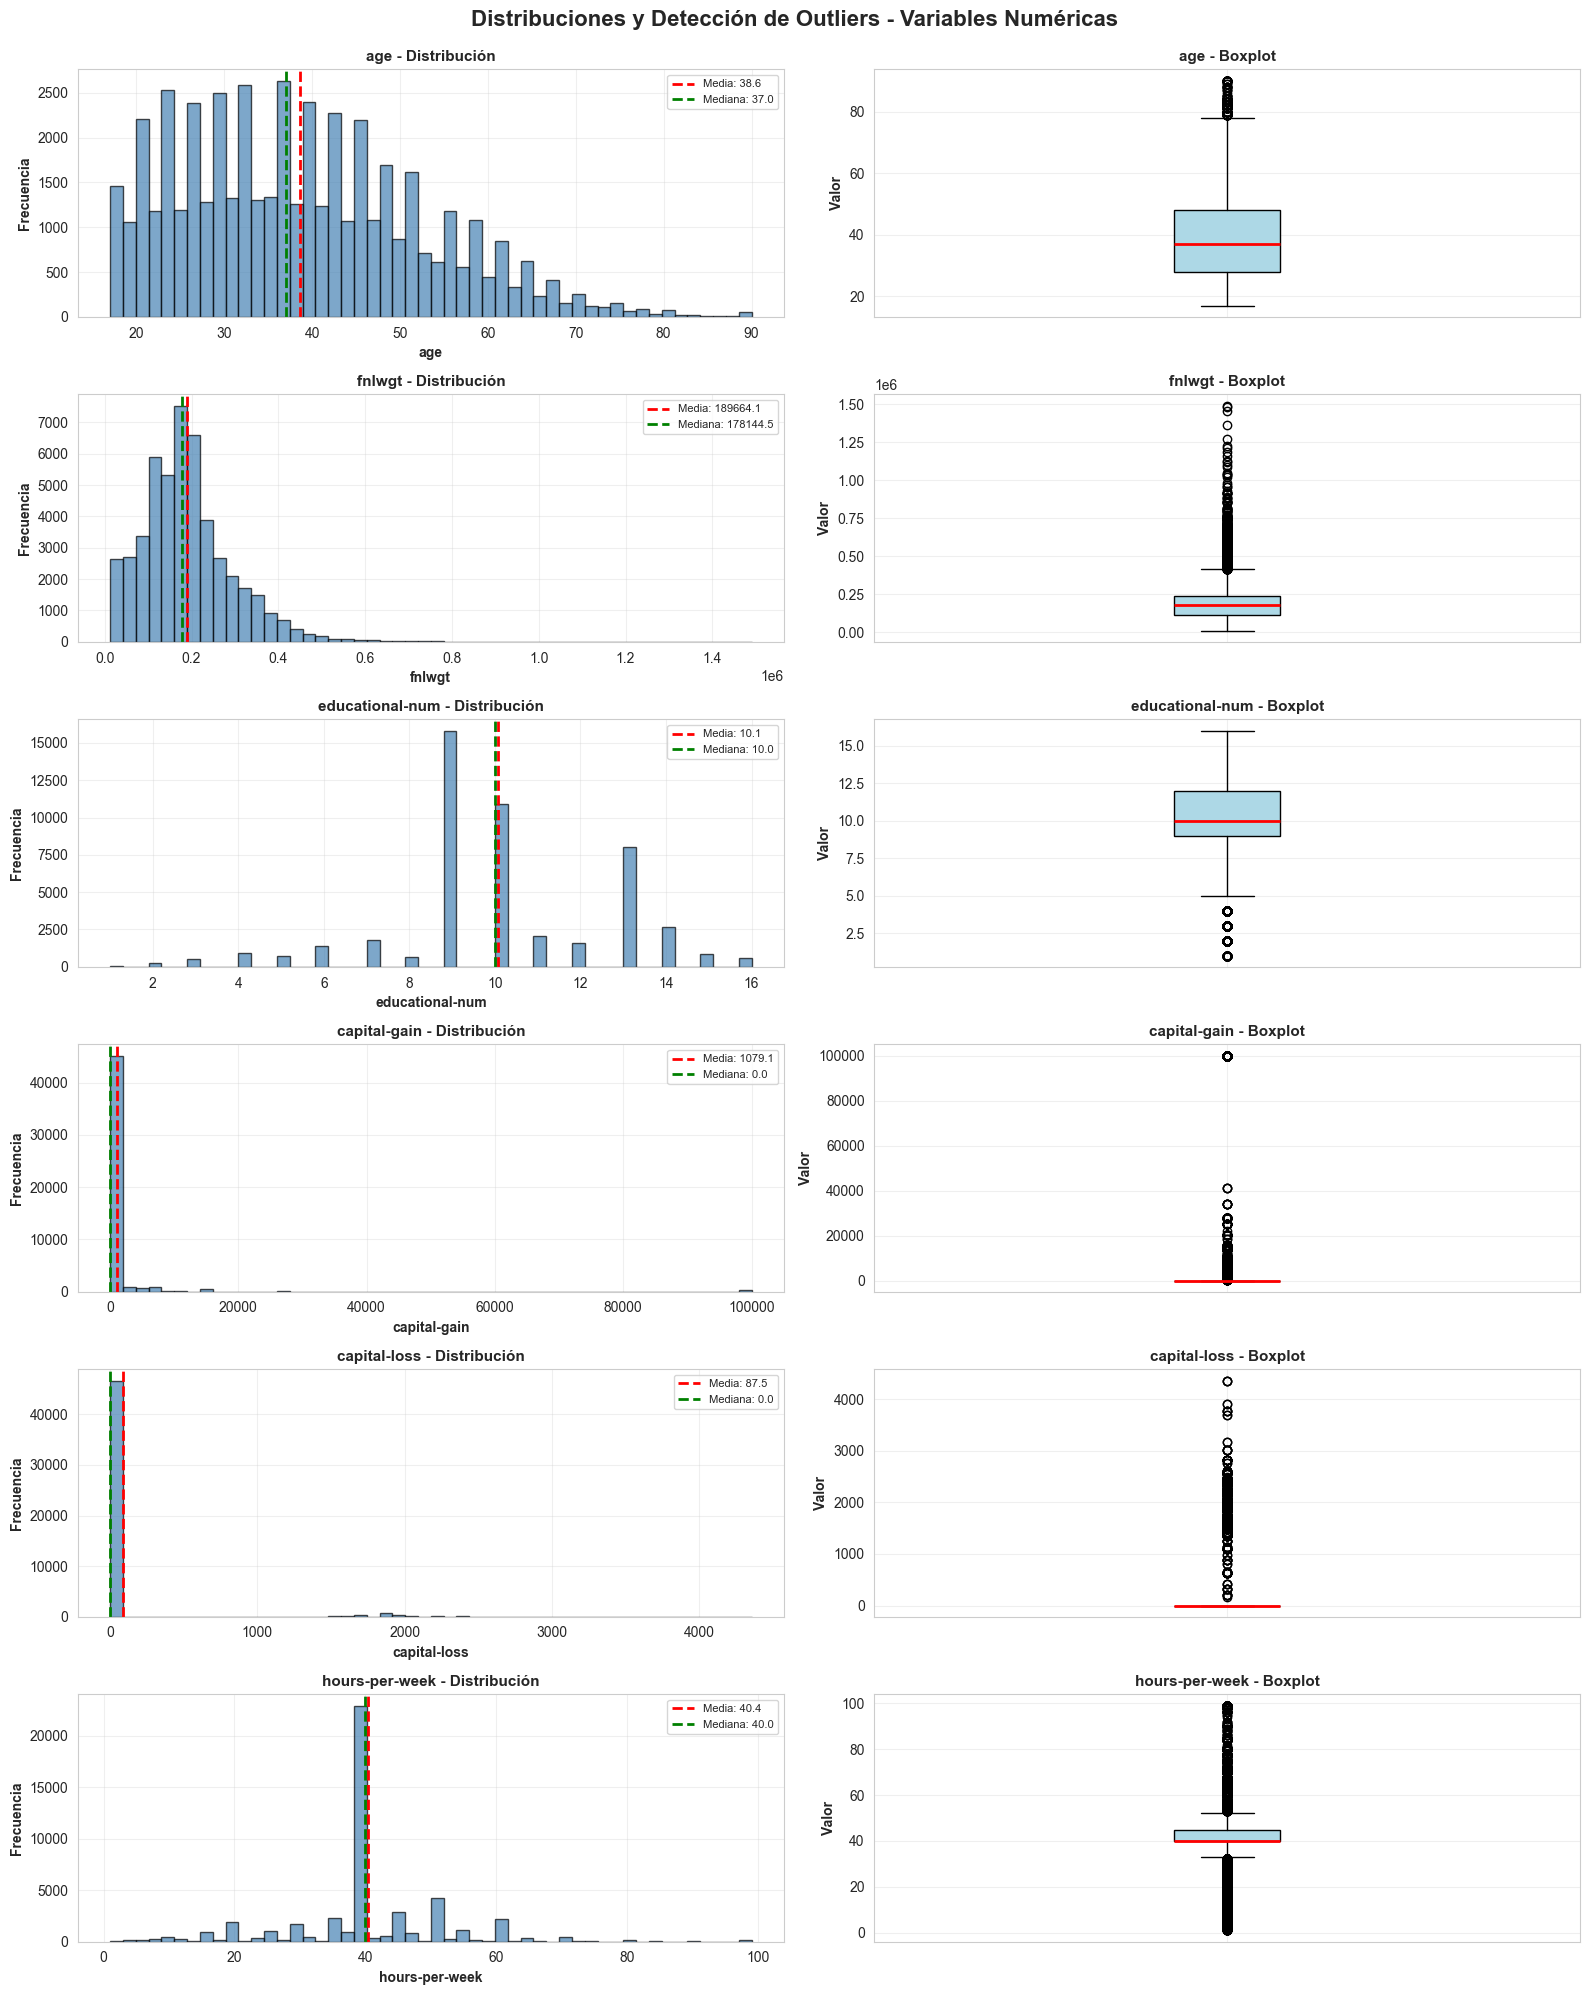

ℹ️  ANÁLISIS DE OUTLIERS (MÉTODO IQR): 


,Variable,Q1,Q3,IQR,Límite Inf,Límite Sup,Outliers,Porcentaje
0,age,28.00,48.00,20.00,-2.00,78.00,216,0.44%
1,fnlwgt,117550.50,237642.00,120091.50,-62586.75,417779.25,1453,2.97%
2,educational-num,9.00,12.00,3.00,4.50,16.50,1794,3.67%
3,capital-gain,0.00,0.00,0.00,0.00,0.00,4035,8.26%
4,capital-loss,0.00,0.00,0.00,0.00,0.00,2282,4.67%
5,hours-per-week,40.00,45.00,5.00,32.50,52.50,13496,27.63%


In [43]:
# Histogramas y boxplots combinados
num_cols_main = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

fig, axes = plt.subplots(6, 2, figsize=(16, 20))
fig.suptitle('Distribuciones y Detección de Outliers - Variables Numéricas', 
             fontsize=16, fontweight='bold', y=0.995)

for idx, col in enumerate(num_cols_main):
    # Histograma (columna izquierda)
    ax_hist = axes[idx, 0]
    data = df[col].dropna()
    ax_hist.hist(data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    ax_hist.axvline(data.mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Media: {data.mean():.1f}')
    ax_hist.axvline(data.median(), color='green', linestyle='--', linewidth=2, 
                    label=f'Mediana: {data.median():.1f}')
    ax_hist.set_title(f'{col} - Distribución', fontweight='bold', fontsize=11)
    ax_hist.set_xlabel(col, fontweight='bold')
    ax_hist.set_ylabel('Frecuencia', fontweight='bold')
    ax_hist.legend(fontsize=8)
    ax_hist.grid(alpha=0.3)
    
    # Boxplot (columna derecha)
    ax_box = axes[idx, 1]
    bp = ax_box.boxplot(data, vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue'),
                         medianprops=dict(color='red', linewidth=2))
    ax_box.set_title(f'{col} - Boxplot', fontweight='bold', fontsize=11)
    ax_box.set_ylabel('Valor', fontweight='bold')
    ax_box.grid(alpha=0.3)
    ax_box.set_xticklabels([''])

plt.tight_layout()
plt.show()

# Análisis de outliers
print("="*70)
ShowInfoMessage("", "ANÁLISIS DE OUTLIERS (Método IQR)")
print("="*70)

outlier_data = []
for col in num_cols_main:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    
    outlier_data.append({
        'Variable': col,
        'Q1': Q1, 
        'Q3': Q3, 
        'IQR': IQR,
        'Límite Inf': lower, 
        'Límite Sup': upper,
        'Outliers': len(outliers),
        'Porcentaje': f"{len(outliers)/len(df)*100:.2f}%"
    })

display(pd.DataFrame(outlier_data))

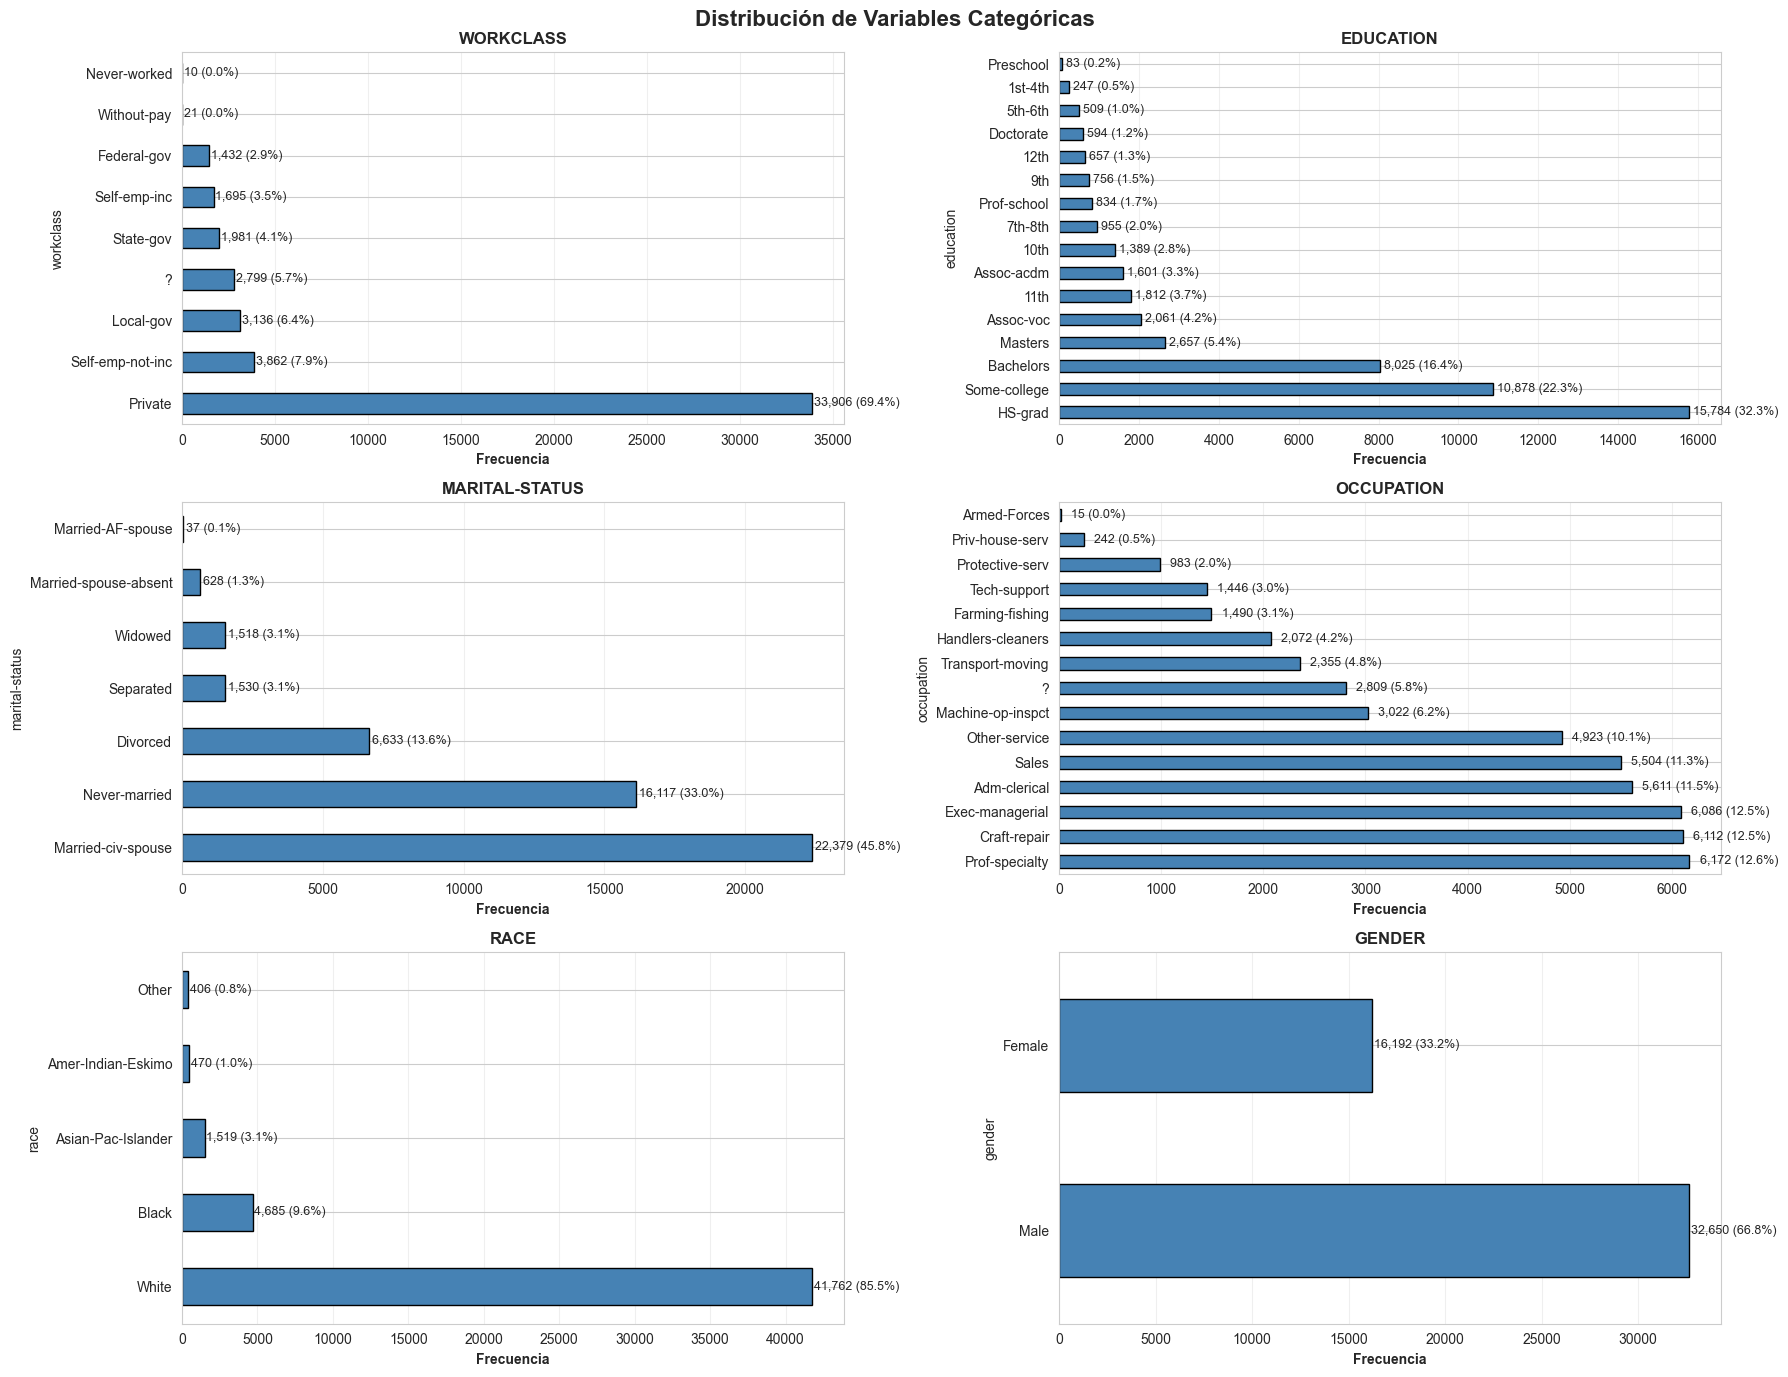

In [44]:
# Countplots
cat_cols_main = ['workclass', 'education', 'marital-status', 'occupation', 'race', 'gender']

fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle('Distribución de Variables Categóricas', fontsize=16, fontweight='bold')

for idx, col in enumerate(cat_cols_main):
    ax = axes[idx//2, idx%2]
    vc = df[col].value_counts()
    vc.plot(kind='barh', ax=ax, color='steelblue', edgecolor='black')
    ax.set_title(col.upper(), fontweight='bold', fontsize=12)
    ax.set_xlabel('Frecuencia', fontweight='bold')
    ax.grid(alpha=0.3, axis='x')
    
    for i, v in enumerate(vc.values):
        ax.text(v+100, i, f'{v:,} ({v/len(df)*100:.1f}%)', va='center', fontsize=9)

plt.tight_layout()
plt.show()

---
## 5. Análisis Bivariado

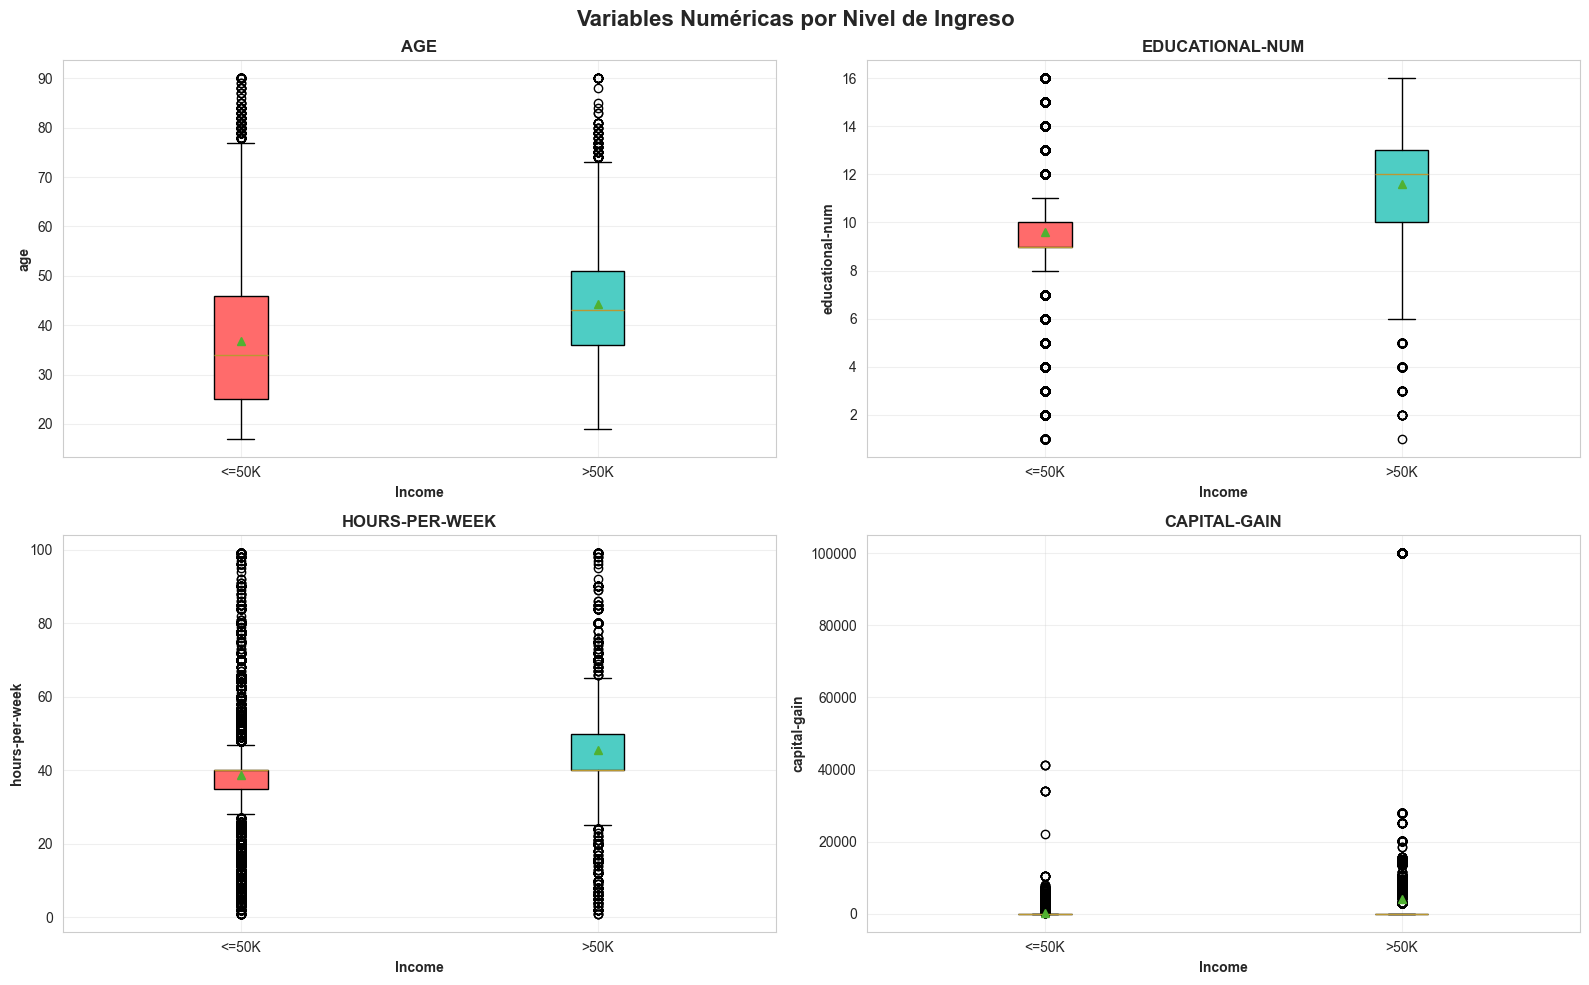

ℹ️  ESTADÍSTICAS POR GRUPO DE INGRESO: 


income                   <=50K     >50K
age             count 37155.00 11687.00
                mean     36.87    44.28
                std      14.10    10.56
                min      17.00    19.00
                25%      25.00    36.00
                50%      34.00    43.00
                75%      46.00    51.00
                max      90.00    90.00
educational-num count 37155.00 11687.00
                mean      9.60    11.60
                std       2.44     2.38
                min       1.00     1.00
                25%       9.00    10.00
                50%       9.00    12.00
                75%      10.00    13.00
                max      16.00    16.00
hours-per-week  count 37155.00 11687.00
                mean     38.84    45.45
                std      12.36    11.09
                min       1.00     1.00
                25%      35.00    40.00
                50%      40.00    40.00
                75%      40.00    50.00
                max      99.00    99.00
capital-gain    count 37155.00 11687.00
                mean    147.01  4042.24
                std     936.75 14756.77
                min       0.00     0.00
                25%       0.00     0.00
                50%       0.00     0.00
                75%       0.00     0.00
                max   41310.00 99999.00

In [45]:
# Boxplots comparativos
num_key = ['age', 'educational-num', 'hours-per-week', 'capital-gain']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Variables Numéricas por Nivel de Ingreso', fontsize=16, fontweight='bold')

for idx, col in enumerate(num_key):
    ax = axes[idx//2, idx%2]
    data = [df[df['income']==cat][col].dropna() for cat in df['income'].unique()]
    bp = ax.boxplot(data, labels=df['income'].unique(), patch_artist=True, showmeans=True)
    
    for patch, color in zip(bp['boxes'], ['#ff6b6b', '#4ecdc4']):
        patch.set_facecolor(color)
    
    ax.set_title(col.upper(), fontweight='bold')
    ax.set_xlabel('Income', fontweight='bold')
    ax.set_ylabel(col, fontweight='bold')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas por grupo
print("="*70)
ShowInfoMessage("", "ESTADÍSTICAS POR GRUPO DE INGRESO")
print("="*70)
display(df.groupby('income')[num_key].describe().T.round(2))

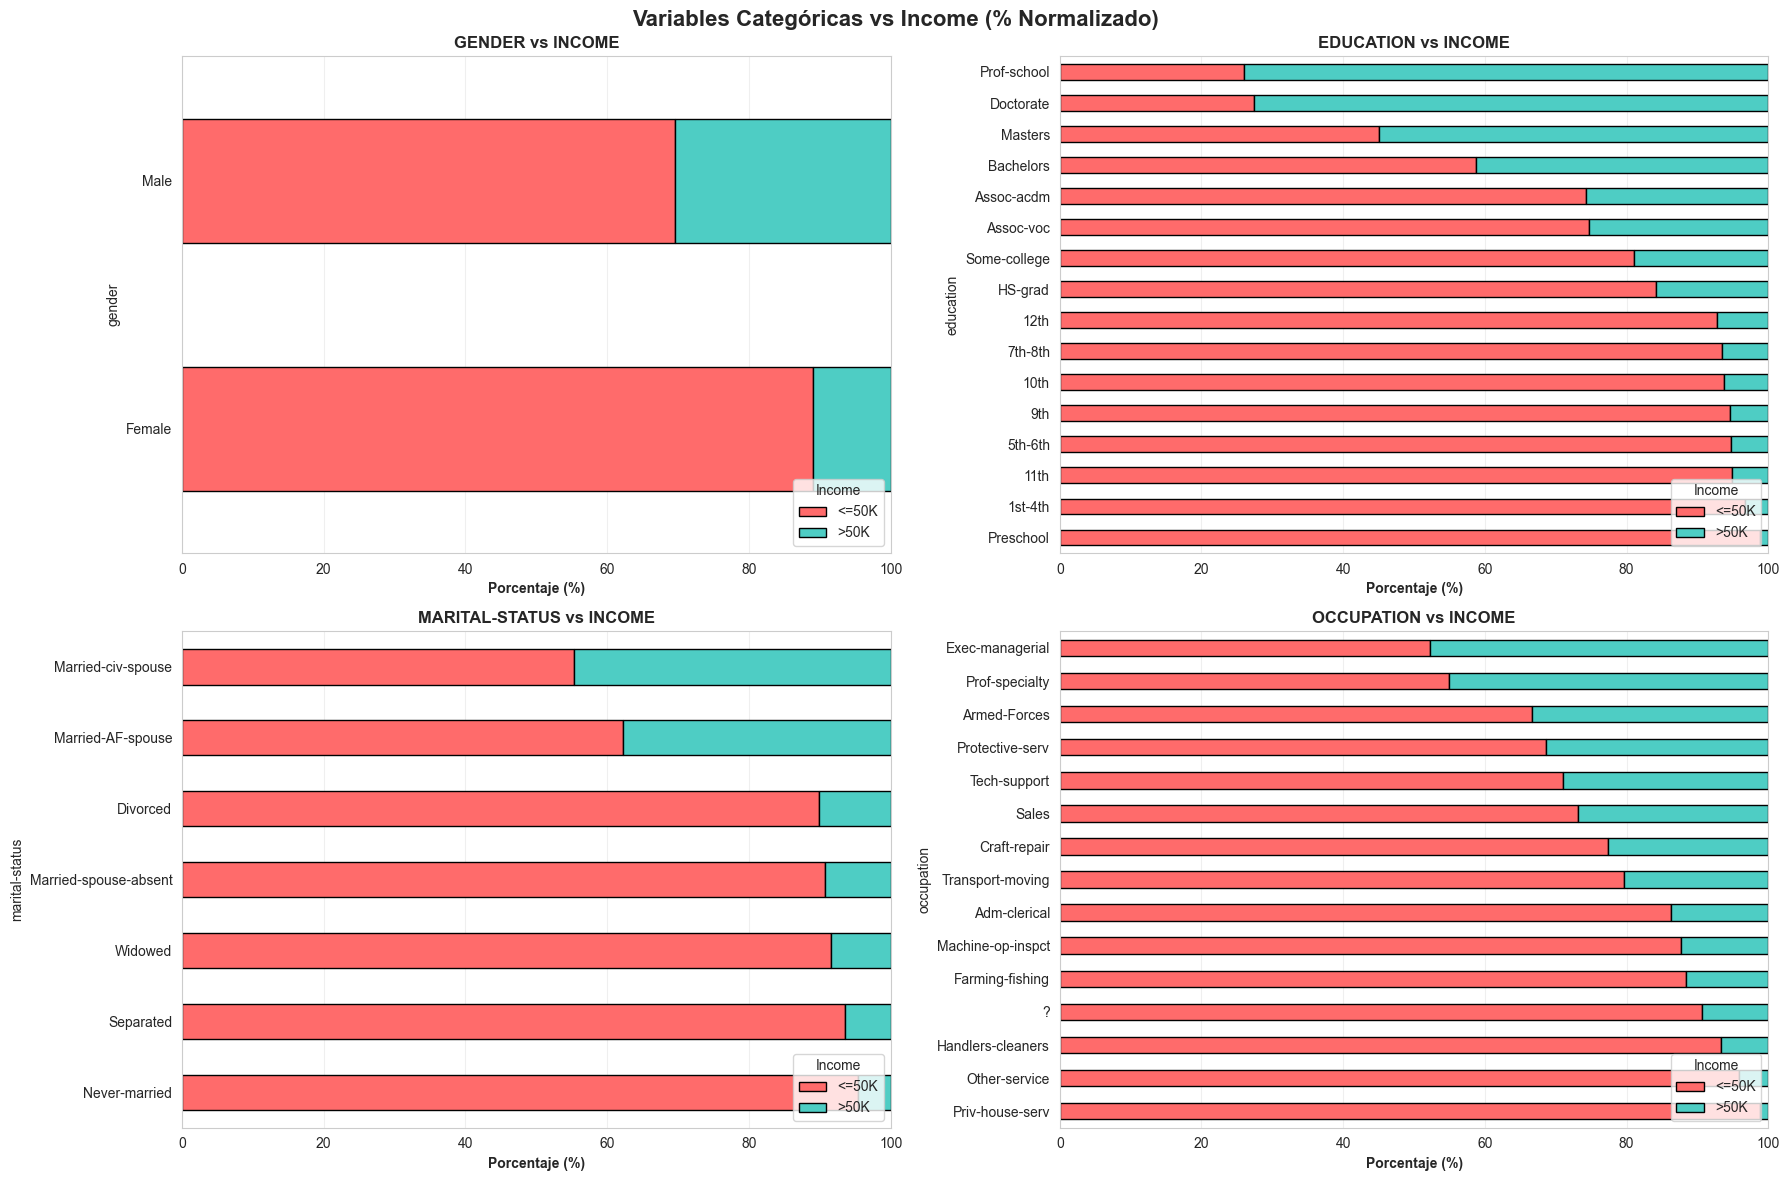

In [46]:
# Gráficos apilados
cat_key = ['gender', 'education', 'marital-status', 'occupation']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Variables Categóricas vs Income (% Normalizado)', fontsize=16, fontweight='bold')

for idx, col in enumerate(cat_key):
    ax = axes[idx//2, idx%2]
    ct = pd.crosstab(df[col], df['income'], normalize='index') * 100
    
    if '>50K' in ct.columns:
        ct = ct.sort_values('>50K', ascending=True)
    
    ct.plot(kind='barh', stacked=True, ax=ax, color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
    ax.set_title(f'{col.upper()} vs INCOME', fontweight='bold')
    ax.set_xlabel('Porcentaje (%)', fontweight='bold')
    ax.legend(title='Income', loc='lower right')
    ax.grid(alpha=0.3, axis='x')
    ax.set_xlim(0, 100)

plt.tight_layout()
plt.show()

---
## 6. Matriz de Correlación

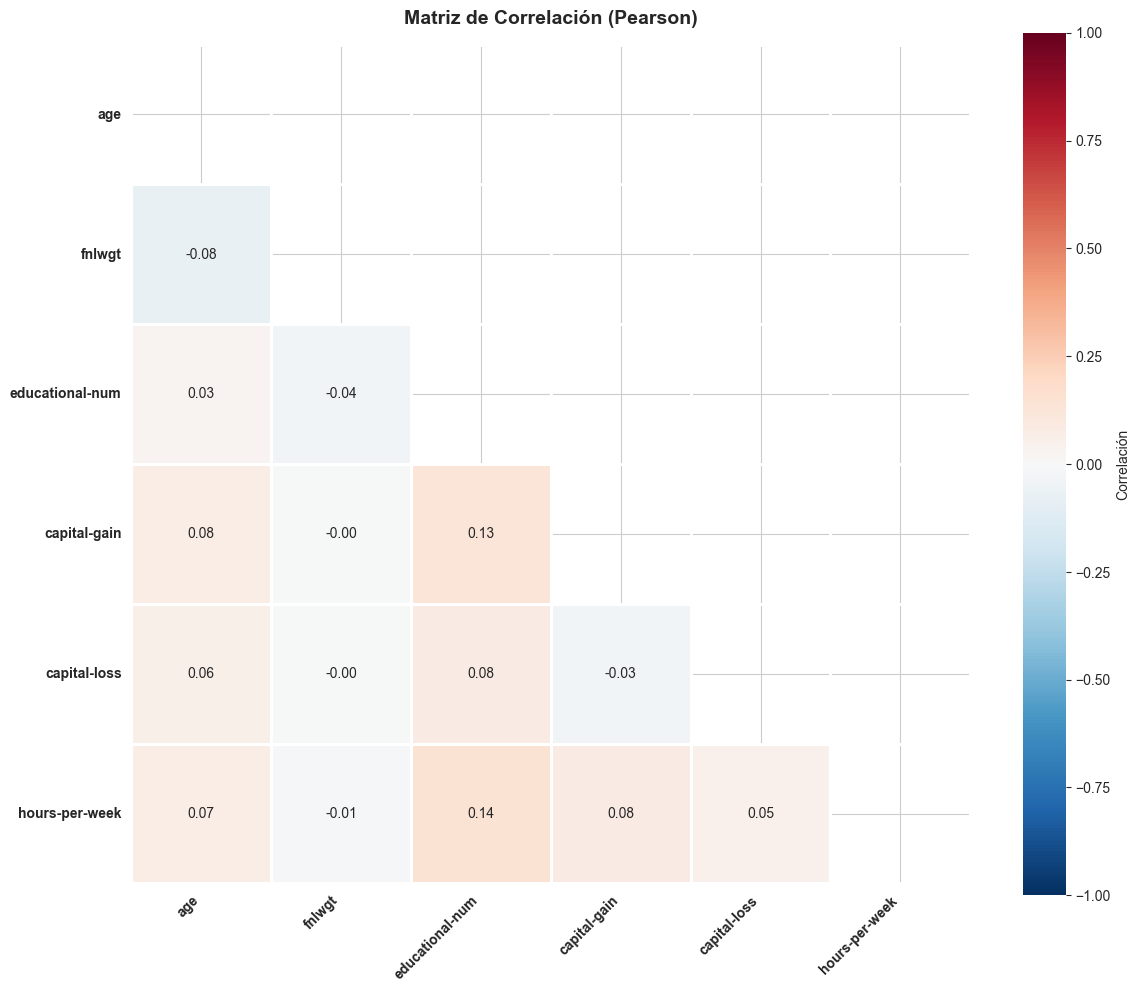

ℹ️  INFO: TOP 10 CORRELACIONES


,Var1,Var2,Correlación
11,educational-num,hours-per-week,0.14
9,educational-num,capital-gain,0.13
13,capital-gain,hours-per-week,0.08
10,educational-num,capital-loss,0.08
2,age,capital-gain,0.08
0,age,fnlwgt,-0.08
4,age,hours-per-week,0.07
3,age,capital-loss,0.06
14,capital-loss,hours-per-week,0.05
5,fnlwgt,educational-num,-0.04


In [47]:
# Matriz de correlación
corr = df.select_dtypes(include=[np.number]).corr()

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=1, cbar_kws={"label": "Correlación"}, vmin=-1, vmax=1, ax=ax)

ax.set_title('Matriz de Correlación (Pearson)', fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(rotation=0, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlaciones
pairs = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        pairs.append({
            'Var1': corr.columns[i],
            'Var2': corr.columns[j],
            'Correlación': corr.iloc[i,j]
        })

pairs_df = pd.DataFrame(pairs).sort_values('Correlación', key=abs, ascending=False)

CORR_QTY = 10
print("="*70)
ShowInfoMessage(f"TOP {CORR_QTY} CORRELACIONES")
print("="*70)
display(pairs_df.head(CORR_QTY))

---
## 7. Hallazgos y Conclusiones

In [48]:
print("="*70)
ShowInfoMessage("", "HALLAZGOS PRINCIPALES")
print("="*70)

# 1. Income
print("\n1. DISTRIBUCIÓN DE INGRESOS:")
for cat in df['income'].unique():
    count = (df['income']==cat).sum()
    pct = count/len(df)*100
    print(f"   {cat}: {count:,} ({pct:.1f}%)")

# 2. Género
print("\n2. DISPARIDAD DE GÉNERO:")
gender_income = pd.crosstab(df['gender'], df['income'], normalize='index')*100
for gender in df['gender'].unique():
    if '>50K' in gender_income.columns:
        print(f"   {gender}: {gender_income.loc[gender, '>50K']:.1f}% ganan >50K")

# 3. Educación
print("\n3. EDUCACIÓN:")
edu = df.groupby('education')['income'].apply(lambda x: (x=='>50K').sum()/len(x)*100).sort_values(ascending=False)
for e, p in edu.head(3).items():
    print(f"   {e}: {p:.1f}%")

# 4. Trabajo
print("\n4. HORAS TRABAJADAS:")
for cat in df['income'].unique():
    hrs = df[df['income']==cat]['hours-per-week'].mean()
    print(f"   Income {cat}: {hrs:.1f} horas/semana")

print("\n" + "="*70)
ShowInfoMessage("", "CONCLUSIONES")
print("="*70)
print("""
- Educación es el predictor más fuerte de ingresos altos
- Existe disparidad de género significativa
- Más horas trabajadas = mayores ingresos
- Estado civil "Married-civ-spouse" tiene mayor % de >50K
- Dataset desbalanceado requiere técnicas de balanceo
- Variables clave: educational-num, age, hours-per-week, marital-status
- Outliers en capital-gain/loss requieren tratamiento
""")
print("="*70)

ℹ️  HALLAZGOS PRINCIPALES: 

1. DISTRIBUCIÓN DE INGRESOS:
   <=50K: 37,155 (76.1%)
   >50K: 11,687 (23.9%)

2. DISPARIDAD DE GÉNERO:
   Male: 30.4% ganan >50K
   Female: 10.9% ganan >50K

3. EDUCACIÓN:
   Prof-school: 74.0%
   Doctorate: 72.6%
   Masters: 54.9%

4. HORAS TRABAJADAS:
   Income <=50K: 38.8 horas/semana
   Income >50K: 45.5 horas/semana

ℹ️  CONCLUSIONES: 

- Educación es el predictor más fuerte de ingresos altos
- Existe disparidad de género significativa
- Más horas trabajadas = mayores ingresos
- Estado civil "Married-civ-spouse" tiene mayor % de >50K
- Dataset desbalanceado requiere técnicas de balanceo
- Variables clave: educational-num, age, hours-per-week, marital-status
- Outliers en capital-gain/loss requieren tratamiento



---
## 8. Exportación de Gráficos a PDF

Generación automática de reporte visual con todos los gráficos del análisis.

In [49]:
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import os

# Crear PDF
pdf_filename = f'Adult_Income_EDA_Graficos_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pdf'

print("="*70)
ShowInfoMessage("", "EXPORTANDO GRÁFICOS A PDF")
print("="*70)
print(f"\nGenerando: {pdf_filename}")

with PdfPages(pdf_filename) as pdf:
    
    # PÁGINA 1: Distribución de Income
    print("  [1/8] Distribución de Income...")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle('Distribución de la Variable Objetivo: INCOME', fontsize=14, fontweight='bold')
    
    income_counts = df['income'].value_counts()
    income_pct = df['income'].value_counts(normalize=True) * 100
    
    income_counts.plot(kind='bar', ax=ax1, color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
    ax1.set_title('Frecuencia Absoluta', fontweight='bold')
    ax1.set_xlabel('Income', fontweight='bold')
    ax1.set_ylabel('Cantidad', fontweight='bold')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
    for i, v in enumerate(income_counts.values):
        ax1.text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')
    
    ax2.pie(income_pct.values, labels=income_pct.index, autopct='%1.1f%%',
            startangle=90, colors=['#ff6b6b', '#4ecdc4'], explode=[0.05, 0.05])
    ax2.set_title('Porcentaje Relativo', fontweight='bold')
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()
    
    # PÁGINA 2: Histogramas
    print("  [2/8] Histogramas de variables numéricas...")
    num_cols_main = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
    
    fig, axes = plt.subplots(3, 2, figsize=(12, 14))
    fig.suptitle('Distribuciones de Variables Numéricas', fontsize=14, fontweight='bold')
    
    for idx, col in enumerate(num_cols_main):
        ax = axes[idx//2, idx%2]
        data = df[col].dropna()
        ax.hist(data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
        ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {data.mean():.1f}')
        ax.axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {data.median():.1f}')
        ax.set_title(col, fontweight='bold')
        ax.set_xlabel(col, fontweight='bold')
        ax.set_ylabel('Frecuencia', fontweight='bold')
        ax.legend(fontsize=8)
        ax.grid(alpha=0.3)
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()
    
    # PÁGINA 3: Boxplots
    print("  [3/8] Boxplots de outliers...")
    fig, axes = plt.subplots(3, 2, figsize=(12, 14))
    fig.suptitle('Boxplots - Detección de Outliers', fontsize=14, fontweight='bold')
    
    for idx, col in enumerate(num_cols_main):
        ax = axes[idx//2, idx%2]
        bp = ax.boxplot(df[col].dropna(), vert=True, patch_artist=True,
                        boxprops=dict(facecolor='lightblue'),
                        medianprops=dict(color='red', linewidth=2))
        ax.set_title(col, fontweight='bold')
        ax.set_ylabel('Valor', fontweight='bold')
        ax.grid(alpha=0.3)
        ax.set_xticklabels([''])
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()
    
    # PÁGINA 4: Variables categóricas
    print("  [4/8] Distribuciones categóricas...")
    cat_cols_main = ['workclass', 'education', 'marital-status', 'occupation', 'race', 'gender']
    
    fig, axes = plt.subplots(3, 2, figsize=(12, 14))
    fig.suptitle('Distribuciones de Variables Categóricas', fontsize=14, fontweight='bold')
    
    for idx, col in enumerate(cat_cols_main):
        ax = axes[idx//2, idx%2]
        vc = df[col].value_counts()
        vc.plot(kind='barh', ax=ax, color='steelblue', edgecolor='black')
        ax.set_title(col.upper(), fontweight='bold')
        ax.set_xlabel('Frecuencia', fontweight='bold')
        ax.grid(alpha=0.3, axis='x')
        
        for i, v in enumerate(vc.values[:8]):
            if i < len(vc):
                ax.text(v+50, i, f'{v:,}', va='center', fontsize=8)
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()
    
    # PÁGINA 5: Income vs Numéricas
    print("  [5/8] Análisis bivariado - Income vs numéricas...")
    num_key = ['age', 'educational-num', 'hours-per-week', 'capital-gain']
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Variables Numéricas por Nivel de Ingreso', fontsize=14, fontweight='bold')
    
    for idx, col in enumerate(num_key):
        ax = axes[idx//2, idx%2]
        data = [df[df['income']==cat][col].dropna() for cat in df['income'].unique()]
        bp = ax.boxplot(data, labels=df['income'].unique(), patch_artist=True, showmeans=True)
        
        for patch, color in zip(bp['boxes'], ['#ff6b6b', '#4ecdc4']):
            patch.set_facecolor(color)
        
        ax.set_title(col.upper(), fontweight='bold')
        ax.set_xlabel('Income', fontweight='bold')
        ax.set_ylabel(col, fontweight='bold')
        ax.grid(alpha=0.3)
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()
    
    # PÁGINA 6: Income vs Categóricas
    print("  [6/8] Análisis bivariado - Income vs categóricas...")
    cat_key = ['gender', 'education', 'marital-status', 'occupation']
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle('Variables Categóricas vs Income (% Normalizado)', fontsize=14, fontweight='bold')
    
    for idx, col in enumerate(cat_key):
        ax = axes[idx//2, idx%2]
        ct = pd.crosstab(df[col], df['income'], normalize='index') * 100
        
        if '>50K' in ct.columns:
            ct = ct.sort_values('>50K', ascending=True).tail(10)
        
        ct.plot(kind='barh', stacked=True, ax=ax, color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
        ax.set_title(f'{col.upper()} vs INCOME', fontweight='bold')
        ax.set_xlabel('Porcentaje (%)', fontweight='bold')
        ax.legend(title='Income', loc='lower right', fontsize=8)
        ax.grid(alpha=0.3, axis='x')
        ax.set_xlim(0, 100)
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()
    
    # PÁGINA 7: Matriz de Correlación
    print("  [7/8] Matriz de correlación...")
    fig, ax = plt.subplots(figsize=(12, 10))
    
    corr = df.select_dtypes(include=[np.number]).corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
                square=True, linewidths=1, cbar_kws={"label": "Correlación"}, 
                vmin=-1, vmax=1, ax=ax)
    
    ax.set_title('Matriz de Correlación (Pearson)', fontsize=14, fontweight='bold', pad=15)
    plt.xticks(rotation=45, ha='right', fontweight='bold')
    plt.yticks(rotation=0, fontweight='bold')
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()
    
    # PÁGINA 8: CONCLUSIONES
    print("  [8/8] Generando conclusiones...")
    fig = plt.figure(figsize=(11, 14))
    fig.patch.set_facecolor('white')
    ax = fig.add_subplot(111)
    ax.axis('off')
    
    # Calcular estadísticas
    income_ratio = df['income'].value_counts().max() / df['income'].value_counts().min()
    gender_stats = pd.crosstab(df['gender'], df['income'], normalize='index') * 100
    edu_top = df.groupby('education')['income'].apply(lambda x: (x=='>50K').sum()/len(x)*100).sort_values(ascending=False).head(3)
    hours_high = df[df['income']=='>50K']['hours-per-week'].mean()
    hours_low = df[df['income']=='<=50K']['hours-per-week'].mean()
    age_mean = df['age'].mean()
    marital_top = df.groupby('marital-status')['income'].apply(lambda x: (x=='>50K').sum()/len(x)*100).sort_values(ascending=False).head(1)
    
    conclusiones = f"""
ANÁLISIS EXPLORATORIO DE DATOS
Adult Income Dataset
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

HALLAZGOS PRINCIPALES

1. DISTRIBUCIÓN DE INGRESOS
   • Dataset desbalanceado con ratio {income_ratio:.2f}:1
   • {df['income'].value_counts().iloc[0]:,} personas ganan ≤50K
   • {df['income'].value_counts().iloc[1]:,} personas ganan >50K

2. DISPARIDAD DE GÉNERO
   • Masculino: {gender_stats.loc['Male', '>50K']:.1f}% ganan >50K
   • Femenino: {gender_stats.loc['Female', '>50K']:.1f}% ganan >50K
   • Brecha: {gender_stats.loc['Male', '>50K'] - gender_stats.loc['Female', '>50K']:.1f} puntos porcentuales

3. EDUCACIÓN
   • {edu_top.index[0]}: {edu_top.iloc[0]:.1f}%
   • {edu_top.index[1]}: {edu_top.iloc[1]:.1f}%
   • {edu_top.index[2]}: {edu_top.iloc[2]:.1f}%

4. HORAS TRABAJADAS
   • Income >50K: {hours_high:.1f} horas/semana
   • Income ≤50K: {hours_low:.1f} horas/semana

5. DEMOGRAFÍA
   • Edad promedio: {age_mean:.1f} años
   • Estado civil top: {marital_top.index[0]} ({marital_top.iloc[0]:.1f}%)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

CONCLUSIONES

- La EDUCACIÓN es el factor más determinante para ingresos altos
- Existe DISPARIDAD DE GÉNERO significativa
- HORAS TRABAJADAS correlacionan con mayores ingresos
- ESTADO CIVIL influye en probabilidad de ingresos >50K
- Variables clave: educational-num, age, hours-per-week
- Presencia de outliers en capital-gain y capital-loss

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Grupo 7: Luis Miguel Ramirez | Espinoza Bone Jose | Aviles Paute Jose
UIDE - Data Mining I - {datetime.now().strftime("%d/%m/%Y")}
"""
    
    ax.text(0.05, 0.95, conclusiones, transform=ax.transAxes,
            fontsize=10, verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.2))
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()
    
    # Metadata
    d = pdf.infodict()
    d['Title'] = 'Análisis Exploratorio - Adult Income Dataset'
    d['Author'] = 'Grupo 7'
    d['CreationDate'] = datetime.now()

print(f"\n✓ PDF generado: {pdf_filename}")
print(f"✓ Total páginas: 8")
print("="*70)

ℹ️  EXPORTANDO GRÁFICOS A PDF: 

Generando: Adult_Income_EDA_Graficos_20250930_182641.pdf
  [1/8] Distribución de Income...
  [2/8] Histogramas de variables numéricas...
  [3/8] Boxplots de outliers...
  [4/8] Distribuciones categóricas...
  [5/8] Análisis bivariado - Income vs numéricas...
  [6/8] Análisis bivariado - Income vs categóricas...
  [7/8] Matriz de correlación...
  [8/8] Generando conclusiones...

✓ PDF generado: Adult_Income_EDA_Graficos_20250930_182641.pdf
✓ Total páginas: 8
